In [669]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as kmeans
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eig

In [670]:
data = np.loadtxt('ex3d.csv', delimiter=',')

rows, cols = data.shape

In [148]:
dist = np.zeros((rows, rows))

In [277]:
for i in range(rows):
    for j in range(i + 1, rows):
        x = data[i]
        y = data[j]
        dist[i, j] = np.sqrt(np.sum(x - y) ** 2)

dist = squareform(pdist(data, 'euclidean'))

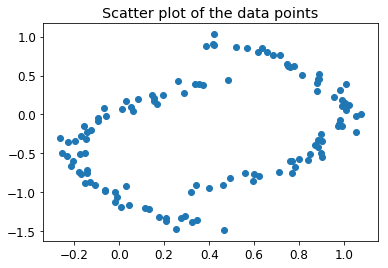

In [667]:
plt.scatter(data[:,0], data[:,1])
plt.title('Scatter plot of the data points')
plt.show()

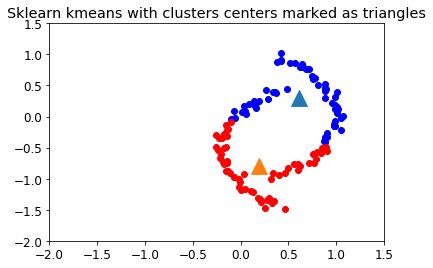

In [666]:
classified = kmeans(n_clusters=2, init='random').fit(data)
labels = classified.labels_

plt.scatter(data[labels == 0, 0], data[labels == 0, 1], color ='blue')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], color ='red')

for x, y in classified.cluster_centers_:
    plt.scatter(x, y, s=250, marker='^')
    
plt.title('Sklearn kmeans with clusters centers marked as triangles')
plt.xlim(-2, 1.5)
plt.ylim(-2, 1.5)
plt.show()

In [658]:
W1 = np.zeros((rows, rows))
W2 = np.zeros((rows, rows))
D1 = np.zeros((rows, rows))
D2 = np.zeros((rows, rows))
 
A = 10

for i, ii in zip(data, range(rows)):
    for j, jj in zip(data, range(rows)):
        d = dist[ii, jj]
        if d <= 0.5:
            W1[ii, jj] = 1
            
for r, i in zip(data, range(rows)):
    ds = dist[i]
    nearest = np.argsort(ds)[1 :A + 1]
    for j in nearest:
        W2[i, j] = 1

for i in range(rows):
    for j in range(rows):
        if W1[i, j]:
            D1[i, i] += 1
        if W2[i, j]:
            D2[i, i] += 1

            
L1 = D1 - W1
L2 = D2 - W2

eval1, evec1 = eig(L1)
eval2, evec2 = eig(L2)

M = 4

idxs1 = np.argsort(eval1)[:M]
idxs2 = np.argsort(eval2)[:M]

vec1 = evec1[:, idxs1]
vec2 = evec2[:, idxs2]


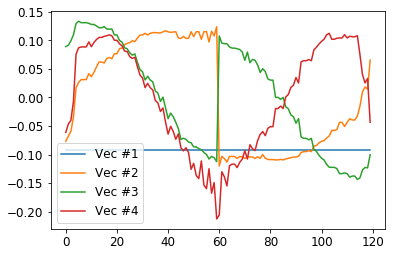

In [542]:
plt.plot(vec1[:, 0], label="Vec #1")
plt.plot(vec1[:, 1], label="Vec #2")
plt.plot(vec1[:, 2], label="Vec #3")
plt.plot(vec1[:, 3], label="Vec #4")
plt.legend()
plt.show()

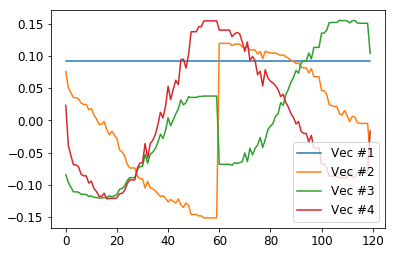

In [543]:

plt.plot(vec2[:, 0], label="Vec #1")
plt.plot(vec2[:, 1], label="Vec #2")
plt.plot(vec2[:, 2], label="Vec #3")
plt.plot(vec2[:, 3], label="Vec #4")
plt.legend()
plt.show()

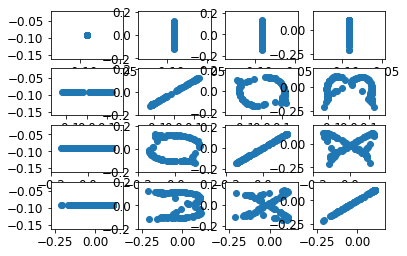

In [544]:

_, pls = plt.subplots(4, 4)

for i in range(4):
    for j in range(4):
        pls[i, j].scatter(vec1[:, i], vec1[:, j])

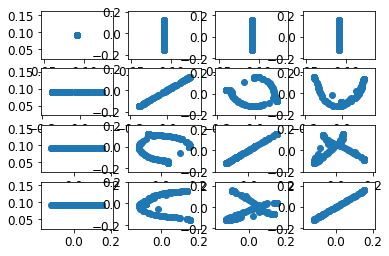

In [545]:

_, pls = plt.subplots(4, 4)

for i in range(4):
    for j in range(4):
        pls[i, j].scatter(vec2[:, i], vec2[:, j])

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

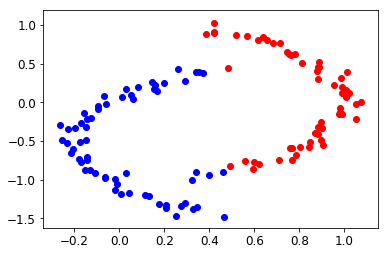

In [665]:
res = kmeans(n_clusters=2).fit(vec1[:, :4])

labels = res.labels_

plt.scatter(data[labels == 0, 0], data[labels == 0, 1], color ='blue')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], color ='red')
res.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

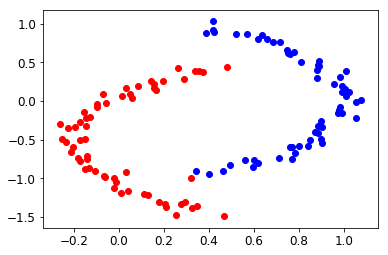

In [662]:
res = kmeans(n_clusters=2, init='random').fit(vec2[:, :4])

labels = res.labels_

plt.scatter(data[labels == 0, 0], data[labels == 0, 1], color ='blue')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], color ='red')
res.labels_

With too low e and A it can't find the complete figure but rather it finds smaller subcomponents in the points that are not connected to one another. Also low e causes multiple eigenvalues to be zero.

With a large M the clusters seem to be random points around the graph and does not represent what we want from the clustering. Too low of M can't capture the variation in the points and the separation is not very good as well. For the sufficient value of M, with 2 the distance based clustering seems to work only slightly worse than with 4, the neighbor based clustering starts to fail when 2 eigenvectors are used, 3 still seems to work well but at 4 the near perfect clustering can be achieved in this instance.